**(1) Data Description:**

***Players.csv:***
196 observations x 7 variables  
VARIABLES:
- experience (chr): pro, veteran, or amateur
- subscribe (lgl): whether the individual is subscribed or not
- hashedEmail (chr): individual's encrypted email address
- played_hours (dbl): hours individual has played
- name (chr): name of individual
- gender (chr): Male, Female, non-binary, Agender, prefer not to say, or other
- age (dbl): age of individual

***Sessions.csv:***
1535 observations x 5 variables  
VARIABLES:
- hashedEmail (chr): individual's encrypted email address
- start_time (chr): when the individual started their playing session
- end_time (chr): when the individual started their playing session
- original_start_time (dbl)
- original_end_time (dbl)

This data is not tidy, as the start_time and end_time variables include values for both the date and the time.


**(2) Questions:**  

Can players' session start and end times from the session data set predict what time windows are most likely to have the largest number of simultaneous players?

In order to address this question we can wrangle the data so that we can pull specific times in the day that people play the game from the data set, and use that information to create a visualization that will help us determine what time of day, on average, has the greatest volume of players.


**(3) Exploratory Data Analysis and Visualization**

In [3]:
library(tidyverse)
library(repr)
source("cleanup.R")
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [30]:
players_data <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")

#make tidy
sessions_data <- sessions_data |>
    separate('end_time', into = c("date", "end_time"), sep = " ") |>
    separate('start_time', into = c("date", "start_time"), sep = " ")
sessions_data

summarized_players <- players_data |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE)
summarized_players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,date,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024,07:12,07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024,02:13,02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024,02:31,02:49,1.71894e+12,1.71894e+12


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


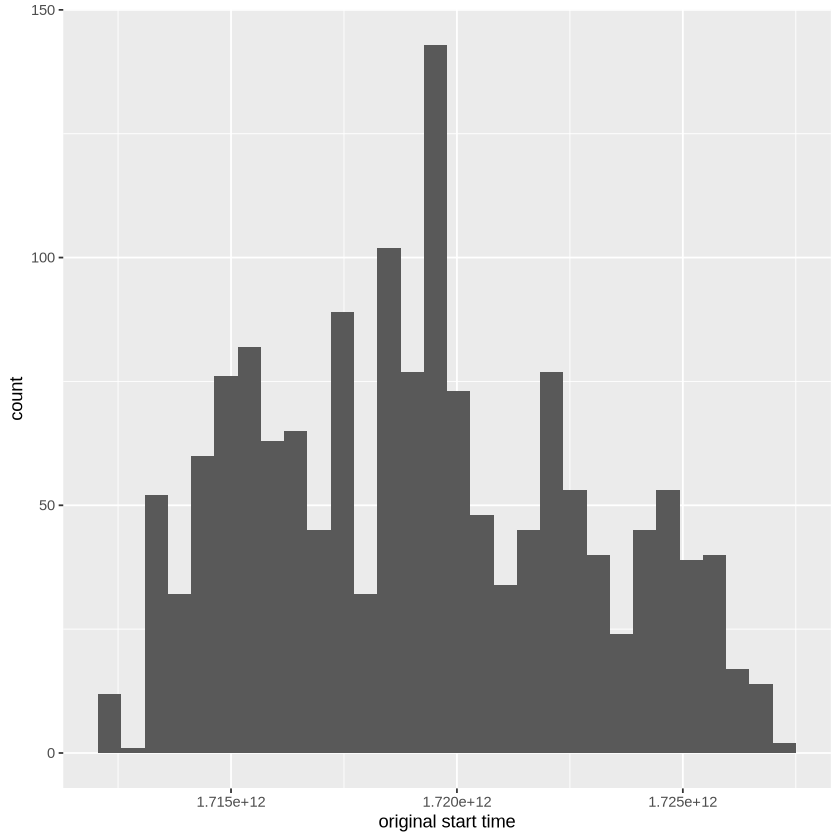

In [28]:
count_bar_chart <- ggplot(sessions_data, aes(x = original_start_time)) + 
    geom_histogram() +
    xlab("original start time") +
    ylab("count")
count_bar_chart

**(4) Methods and Plan**